In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eren\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
df = pd.read_csv("veri_800.csv", header=None, names=["review"])

In [7]:
df

,review
review,game_name
"2022 Simply incredible. With essential patches of first months and addition of Immortal Empires, this game is simply breathtaking!",Total War: WARHAMMER III
"09/05/2024 - Game 100% unplayable09/06/2024 - Game 100% unplayable09/07/2024 - Game 100% unplayable.09/08/2024 - Game 100% unplayable.09/09/2024 - Official release date. Still 100% unplayable.09/10/2024 - Game 100% unplayable.09/11/2024 - Game 100% unplayable.09/12/2024 - Game 100% unplayable.09/13/2024 - Game 100% unplayable.09/14/2024 - Game 100% unplayable.09/15/2024 - Game 100% unplayable.09/16/2024 - Game 100% unplayable.09/17/2024 - Game 100% unplayable.09/18/2024 - Game 100% unplayable.09/19/2024 - Game 100% unplayable.09/20/2024 - Game 100% unplayable. STILL does not launch properly and freezes at launch OR otherwise the gameplay freezes every 10 seconds. I got this game on cdkeys so I can't even get a refund either. Simply amazing.I also submitted a ticket on the Focus website and they responded to my ticket saying that they are investigating these issues still but no fix at this time and they did not provide any ETA.I'm no longer wasting my time trying to find a fix. I have almost 2000 games on steam and this is the only one that is having this issue. It's not an issue with my system. This game is very clearly the issue and I highly suggest anyone else experiencing similar issues to report this game as broken on steam.Original review:Game won't even launch. I have a nvidia 3090 gpu, AMD 5950x cpu, 128gb ddr4 ram, m.2 ssd for boot and the game is installed on a separate m.2. When I launch the game it pops up with the anticheat screen loading. After that it goes full screen just black and says not responding. No amount of troubleshooting I seem to do fixes it. I can't even get to the main menu.Figured out to get it to launch literally just click launch from steam and WAIT and eventually it will load. DO NOT CLICK ANYTHING ELSE UNTIL IT LOADS.The default setting when the game starts is set to UNLIMITED FRAME RATE. Like good lord my computer was pushing 240fps in 1440p my computer was just an absolute space heater until I locked the framerate to 60.Even after turning unlimited framerate off I realized simply the act of LAUNCHING THE GAME pushes my GPU and CPU so incredibly hard that both temperatures will reach around 90 celsius almost instantly.When I am able to start the actual campaign the gameplay freezes literally almost 10 seconds. It is like a 50% chance of it crashing whenever it freezes otherwise it just freezes every 10 seconds.Also sometimes the mission gameplay will get sent into a loading screen saying ""disconnected"" and ""changing host"" and will just send you back to the beginning of the mission. Absolutely ridiculous.Turned everything to lowest settings, vsync off. Even changed display setting to 1920x1080p and being in the main menu or in the mission runs my CPU/GPU up to 90 celsius almost instantly. My conclusion right now is that it's terrifying to run this game because of how insanely hard this game appears to be pushing my system even when all settings are turned down/off and I believe that the game is breaking because of something like that. Besides that I also think the servers are not built for the magnitude and are just bogged down right now too.Ain't it something that everyone here paid 80-100 bucks for this just for it to be completely unplayable for half the community.","Warhammer 40,000: Space Marine 2"
"Black Myth: Wukong Beat the game with multiple endings around 50hrs playtime,Excellent A-RPG game which borrowed heavily elements from Soulsborne but few points could be improved:+Amazing combat gameplay, skills unlockable with skill tree equivalent Sekiro game, with Spells, transformation, vessel, and spirits as you progress on early chapter.+Divided by chapter but you could backtrack the previous it even on next chapter+OSTs are amazing, Orchestrated wukong tv series version for this game+Moderate length cut

In [9]:
def zipf_analysis(text_column, num_words=50):
    # Geçersiz ve boş değerleri temizle
    cleaned_texts = text_column.dropna().astype(str)

    if cleaned_texts.empty:
        print("Uyarı: Metin verisi boş. Analiz yapılamaz.")
        return

    # Metinleri birleştir ve temizle
    text = ' '.join(cleaned_texts).lower()
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenizasyon
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token.isalpha()]

    if not tokens:
        print("Uyarı: Temizleme sonrası analiz yapılacak kelime kalmadı.")
        return

    # Kelime sıklığı
    word_counts = Counter(tokens)
    most_common_words = word_counts.most_common(num_words)

    # Sıra ve sıklık verileri
    ranks = np.arange(1, len(most_common_words) + 1)
    frequencies = [count for word, count in most_common_words]

    # Grafik
    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, frequencies, marker='o')
    plt.xlabel('Kelime Sırası (log)')
    plt.ylabel('Kelime Sıklığı (log)')
    plt.title('Zipf Yasası Analizi (Ham Veri)')
    plt.grid(True)
    plt.show()

    # Bilgi çıktısı
    print(f"Toplam kelime sayısı: {len(tokens)}")
    print(f"Farklı kelime sayısı: {len(word_counts)}")

    if len(tokens) < 10000:
        print("Veri seti küçük. Zipf analizi sınırlı genellenebilir.")
    else:
        print("Veri seti yeterli büyüklükte.")

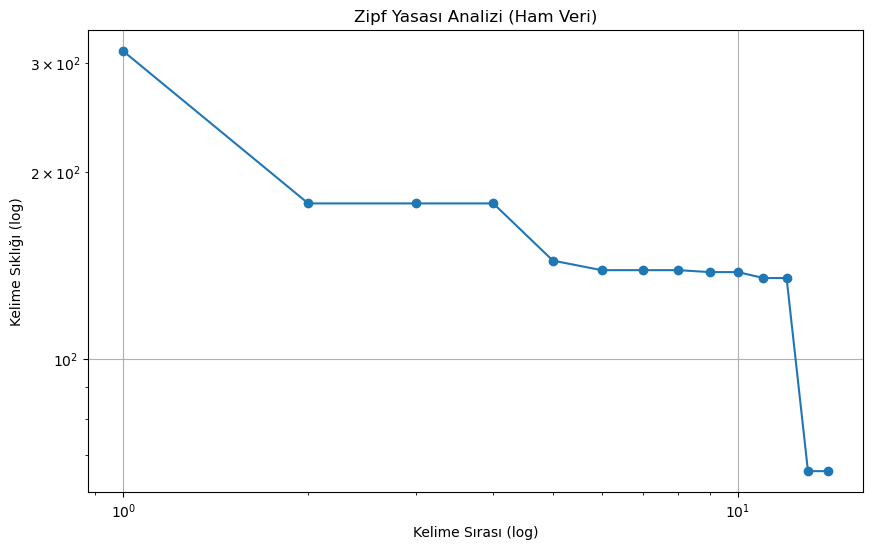

Toplam kelime sayısı: 2086
Farklı kelime sayısı: 14
Veri seti küçük. Zipf analizi sınırlı genellenebilir.


In [11]:
df = pd.read_csv("veri_800.csv", header=None, names=["review"])
zipf_analysis(df["review"])